# TP 01 : Approche de la logique floue

##### Auteur : BARCHID Sami

## Introduction
Ce document est un compte rendu des exercices à réaliser dans le cadre du TP n°01 sur la Logique floue dans le cours VisA de l'option M2-IVI.

Les exercices présentés dans ce TP mettent en scène une situation où, sur base d'une variable linguistique "Température", nous devons chauffer quelque chose plus ou moins fort. Pour vulgariser, c'est comme si on cherchait à mimer le comportement d'un chauffage/chauffe-eau/etc.

Dans ce compte rendu, je présenterai :
1. **Fonctions d'appartenances** : définition de la variable linguistique "Température et exploitations des différents ensembles flous qui la composent.
2. **Opérateurs de la logique floue** : implémentation d'opérations relatives à la logique floue.
3. **Implication floue** : introduction d'une nouvelle variable linguistique avec laquelle nous allons pratiquer une implication de Mamdani avec la variable linguistique "Température".


In [1]:
# Imports utilisés pour la suite
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')  # pour l'affichage des graphique

## 1. Fonctions d'appartenance

### 1.1. Définition de la variable linguistique "Température"

La variable linguistique "Température" est représentée par un triplet $(V,U_V,T_V)$ où :
- $V =$ "Température", le nom de la variable
- $U_V = [0,40] °C$ est l'ensemble des valeurs de l'univers du discours. *(Note : on ne conserve que 0 à 40°C car ce sont les limites des graphiques fournis dans l'énoncé)*
- $T_V = \{ Basse, Moyenne, Elevee \}$, l'ensemble des ensembles flous utilisés pour caractérisé la variable. Ces trois ensembles flous sont définis par leur fonction d'appartenance montrée dans l'énoncé.

Nous allons maintenant implémenter la variable linguistique "Température" et afficher le graphique représentant les trois ensembles flous de $T_V$.

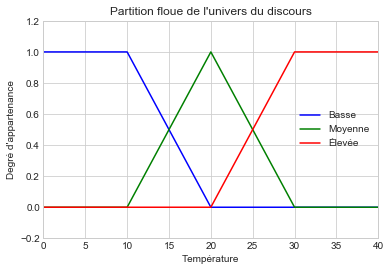

In [2]:
######################################################
# Définition de la variable linguistique "température"
######################################################
######################################################


V = "Température"
U_v = range(0, 41)  # [0,40] °C pour l'univers du discours

# DÉFINITIONS DES FONCTIONS D'APPARTENANCE POUR LES ENSEMBLES FLOUS

# Basse
def basse(x):
    if x <= 10:
        return 1.
    if x >= 20:
        return 0.
    # équation de la droite qui va entre 10 et 20 °C (y = ax + b)
    return -1./10. * x + 2

# Moyenne
def moyenne(x):
    if x <= 10 or x >= 30:
        return 0

    if x <= 20:
        return 1./10. * x - 1
    else:
        return -1./10. * x + 3

# Elevee
def elevee(x):
    if x <= 20:
        return 0
    if x >= 30:
        return 1
    return 1./10. * x - 2

# Création de T_v, l'ensemble des ensembles flous
T_v = {
    "Basse": basse,
    "Moyenne": moyenne,
    "Elevee": elevee
}

# On obtient le triplet définissant la variable linguistique température
temperature = (V, U_v, T_v)

# Affichage de l'univers du discours
plt.title("Partition floue de l'univers du discours")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(V)
plt.xlim(0, 40)
plt.plot([0, 10, 20, 30, 40], [basse(0), basse(10), basse(20), basse(30), basse(40)], label="Basse", color='blue')
plt.plot([0, 10, 20, 30, 40], [moyenne(0), moyenne(10), moyenne(20), moyenne(30), moyenne(40)], label="Moyenne", color='green')
plt.plot([0, 10, 20, 30, 40], [elevee(0), elevee(10), elevee(20), elevee(30), elevee(40)], label="Élevée", color='red')
plt.legend()
plt.show()

### 1.2. Calcul de degré d'appartenance

Maintenant que nous avons défini la variable linguistique, nous pouvons obtenir les degrés d'appartenance aux différents sous-ensembles pour une température donnée. Ici, la température pour laquelle nous voulons obtenir le degré d'appartenance est $16°C$.

In [3]:
# Donner les degrés d'appartenance aux différents sous-ensemble pour une température mesurée de 16°C
print("degré d'appartenance pour basse(16) = " + str(round(basse(16), 2)))
print("degré d'appartenance pour moyenne(16) = " + str(round(moyenne(16), 2)))
print("degré d'appartenance pour elevee(16) = " + str(round(elevee(16), 2)))

degré d'appartenance pour basse(16) = 0.4
degré d'appartenance pour moyenne(16) = 0.6
degré d'appartenance pour elevee(16) = 0


### 1.3. Opérateurs de logique floue

Il est possible maintenant d'implémenter les différents opérateurs en logique floue. Les opérateurs de logique floue que nous utilisons ici sont les **opérateurs MIN/MAX de Zadeh**.

Nous allons, pour l'exemple, implémenter les opérateurs "union" et "intersection" en logique floue. Les formules de ces deux opérateurs sont :
- **Union :** $\mu_{A \cup B}(x) = max( \mu_A (x), \mu_B (x) )$
- **Intersection :** $\mu_{A \cap B}(x) = min( \mu_A (x), \mu_B (x) )$

In [4]:
def fuzzy_union(A, B, x):
    """
    Fonction d'appartenance correspondant à l'ensemble flou (A U B)
    où A et B sont des ensembles flous (comme ceux définis précédemment)
    """
    return max(A(x), B(x))


def fuzzy_intersection(A, B, x):
    """
    Fonction d'appartenance correspondant à l'ensemble flou (A INTER B)
    où A et B sont des ensembles flous (comme ceux définis précédemment)
    """
    return min(A(x), B(x))

Il est maintenant possible de tracer le graphique représentant l'ensemble flou "Température basse OU moyenne" :

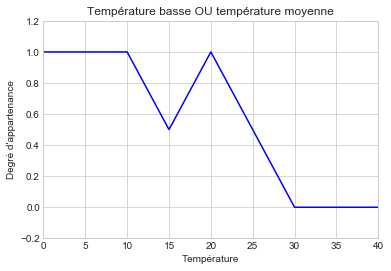

In [5]:
plt.title("Température basse OU température moyenne")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(V)
plt.xlim(0, 40)

plt.plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [
    fuzzy_union(basse, moyenne, 0),
    fuzzy_union(basse, moyenne, 5),
    fuzzy_union(basse, moyenne, 10),
    fuzzy_union(basse, moyenne, 15),
    fuzzy_union(basse, moyenne, 20),
    fuzzy_union(basse, moyenne, 25),
    fuzzy_union(basse, moyenne, 30),
    fuzzy_union(basse, moyenne, 35),
    fuzzy_union(basse, moyenne, 40)
], color='blue')

plt.show()

## 2. Opérateurs de la logique floue

Nous avons implémenté les fonctions d'appartenance pour les deux opérateurs "OR" et "AND" dans l'exercice précédent. Ces deux opérateurs peuvent aussi être connus respectivement sous le nom de "opérateur max" et "opérateur min".

Dans cette partie, nous testons les opérateurs logiques sur les fonctions d'appartenance de température dans le but de tracer plusieurs sous ensembles flous différents.

Les graphiques tracés ci-dessous sont :
- $basse \cup moyenne$
- $moyenne \cap elevee$
- $basse \cap elevee$


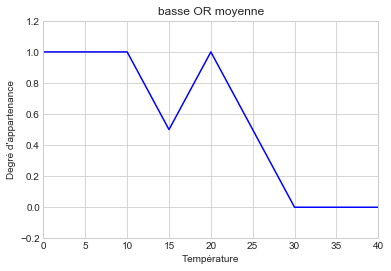

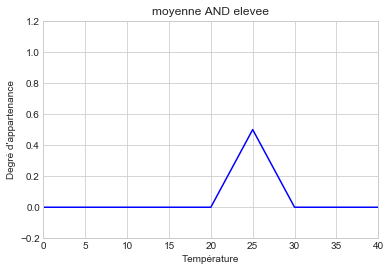

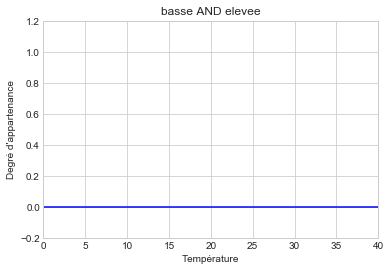

In [6]:
# basse OR moyenne
plt.title("basse OR moyenne")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(V)
plt.xlim(0, 40)
degres_appartenance = []
for x in range(0, 41):
    degres_appartenance.append(fuzzy_union(basse, moyenne, x))
plt.plot(range(0,41), degres_appartenance, color="blue")
plt.show()

# moyenne AND elevee
plt.title("moyenne AND elevee")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(V)
plt.xlim(0, 40)
degres_appartenance = []
for x in range(0, 41):
    degres_appartenance.append(fuzzy_intersection(moyenne, elevee, x))
plt.plot(range(0,41), degres_appartenance, color="blue")
plt.show()

# basse AND elevee
plt.title("basse AND elevee")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(V)
plt.xlim(0, 40)
degres_appartenance = []
for x in range(0, 41):
    degres_appartenance.append(fuzzy_intersection(basse, elevee, x))
plt.plot(range(0,41), degres_appartenance, color="blue")
plt.show()

Nous obtenons bien les fonctions d'appartenance qu'il faut.


## 3. Implication floue
Le but de cette dernière partie de TP est de :
- introduire la nouvelle variable linguistique "Puissance de chauffe"
- implémenter l'implication de Mamdani
- tracer la courbe de l'ensemble flou résultant de la règle "SI température faible ALORS chauffer fort" lorque la température mesurée est de 12°C en utilisant l'implication de Mamdani.

### 3.1. Définition de la variable linguistique "Puissance de chauffe"

La variable linguistique "Puissance de chauffe" est représentée par un triplet $(W,U_W,T_W)$ où :
- $W =$ "Puissance  de chauffe", le nom de la variable
- $U_W = [0,15] KW $ est l'ensemble des valeurs de l'univers du discours. *(Note : on ne conserve que 0 à 15 KW car ce sont les limites des graphiques fournis dans l'énoncé)*
- $T_W = \{$ "chauffer fort" $\}$, l'ensemble des ensembles flous utilisés pour caractérisé la variable (en l'occurrence ici, on n'en a qu'un).

Nous allons maintenant implémenter la variable linguistique "Puissance de chauffer" et afficher le graphique représentant l'ensemble flou "chauffer fort" de $T_W$.

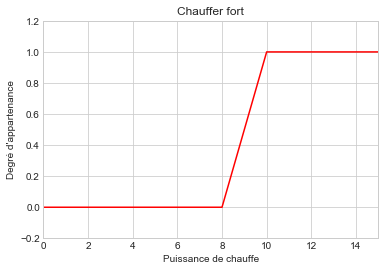

In [7]:
###############################################################
# Définition de la variable linguistique "Puissance de chauffe"
###############################################################
###############################################################
W = "Puissance de chauffe"
U_w = range(0, 16)

# Définition de la fonction d'appartenance pour l'ensemble flou "Chauffer fort"
def chauffer_fort(x):
    if x <= 8:
        return 0
    if x >= 10:
        return 1
    return 1./2. * x - 4

T_w = {"Chauffer fort": chauffer_fort}

# On obtient le triplet définissant la variable linguistique "puissance de chauffe"
puissance_chauffe = (W, U_w, T_w)

# Tracer le graphique de l'ensemble flou "Chauffer fort"
plt.title("Chauffer fort")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(W)
plt.xlim(0, 15)

degres_appartenance = []
for x in range(0, 16):
    degres_appartenance.append(chauffer_fort(x))
plt.plot(range(0,16), degres_appartenance, color="red")
plt.show()


### 3.2. Implication de Mamdani

L'implication de Mamdani est une implication donnée par la formule suivante :
\begin{equation*}
\forall {y \in U_y}, \mu'_{conclusion}(y) = \min_{y \in U_y} { ( \mu_{predicate}(x_0), \mu_{conclusion}(y) ) }
\end{equation*}

où :
- $y \in U_y$ correspond à chaque valeur $y$ dans l'univers du discours $U_y$ dans lequel est définie la conclusion
- $\mu_{conclusion}(y)$ correspond au degré d'appartenance de $y$ selon la fonction d'appartenance de l'ensemble flou de conclusion.
- $\mu'_{conclusion}(y)$ correspond au degré d'appartenance de $y$ selon l'ensemble flou de sorti issu de l'implication de Mamdani.
- $\mu_{predicate}$ correspond au prédicat.
- $x_0$ est la valeur observée (et donc donnée à l'avance) qui sert au prédicat pour fournir une valeur.

Avec cette formule, il est possible d'implémenter l'implication de Mamdani.

In [8]:
def implication_mamdani(predicat, x_0, conclusion, U_y):
    """
    Fonction qui permet de donnerl'ensemble flou de sorti issu de l'implication de Mamdani.
    :param predicat: fonction d'appartenance correspondant au prédicat
    :param x_0: valeur observée utilisée par le prédicat
    :param conclusion: fonction de conclusion
    :param U_y: univers du discours dans lequel sera défini l'ensemble flou de sortie issu de l'implication.
    :return: l'ensemble flou de sorti issu de l'implication de Mamdani
    """
    # application simple de la formule
    sortie = []
    for y in U_y:
        sortie.append(
            min(predicat(x_0), conclusion(y))
        )
    return sortie

### 3.3. Application de l'implication de Mamdani

Soit la règle floue : "SI *température basse* ALORS *chauffer fort*.
Soit une température observée de 12°C.

Nous allons utiliser l'implication de Mamdani vue plus tôt pour donner l'allure de l'ensemble flou de sorti issu de cette règle. En faisant référence à l'équation vue précédemment, nous pouvons définir ici que :

- $x_0 = 12°C$.
- $\mu_{predicate} = $ basse.
- $\mu_{conclusion}$ = chauffer fort.
- $U_y = $ l'univers du discours de la variable linguistique "Puissance de chauffe".

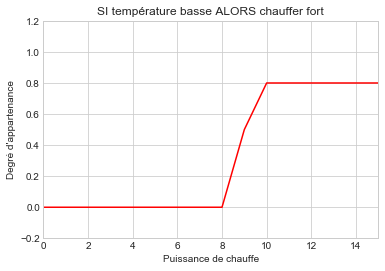

In [9]:
# Appliquer l'implication de Mamdani grâce à la fonction définie précédemment
sortie = implication_mamdani(basse, 12, chauffer_fort, U_w)

# Afficher l'allure de la sortie
plt.title("SI température basse ALORS chauffer fort")
plt.ylabel('Degré d\'appartenance')
plt.ylim(-0.2, 1.2)
plt.xlabel(W)
plt.xlim(0, 15)

plt.plot(U_w, sortie, color='red')
plt.show()

## Conclusion
Dans ce TP, nous avons vu les notions de base de la logique floue en testant et en implémentant des ensembles flous, des opérateurs logiques flous et l'implication de Mamdani. Dans le raisonnement flou, nous avons pu manipuler des entrées fuzzyfiées.

Pour aller plus loin, après la partie 3, il aurait été possible d'implémenter la défuzzification (càd calculer le centre de gravité de l'ensemble flou de sorti après implication) pour obtenir une valeur finale à la sortie de la règle floue.